In [2]:
import os
import sys
import pandas as pd
import numpy as np
import xarray as xr
import xgcm
from xgcm import Grid
import xmitgcm
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import warnings 
warnings.filterwarnings('ignore')
import ffmpeg
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
import matplotlib.patches as mpatches
from matplotlib import cm

In [3]:
data_dir = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/run_final'  

In [3]:
ADJtaux=open_mdsdataset(data_dir,prefix= ['ADJtaux'],ignore_unknown_vars=True)
ADJtauy=open_mdsdataset(data_dir,prefix= ['ADJtauy'],ignore_unknown_vars=True)
#ADJqnet=open_mdsdataset(data_dir,prefix= ['ADJqnet'],ignore_unknown_vars=True)

In [4]:
ds=xr.merge([ADJtaux, ADJtauy])

In [4]:
ADJqnet=open_mdsdataset(data_dir,prefix= ['ADJqnet'],ignore_unknown_vars=True)
ds=xr.merge([ADJqnet])

In [5]:
grid = xgcm.Grid(ds, periodic=['X', 'Y'])
maskZ = grid.interp(ds.hFacS, 'X')

In [6]:
# load 10 year forcing file
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/trenberth_taux_10y.bin'  
raw = np.fromfile(file, dtype='>f')
taux=np.reshape(raw, (120,40,90))
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/trenberth_tauy_10y.bin'  
raw = np.fromfile(file, dtype='>f')
tauy=np.reshape(raw, (120,40,90))
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/ncep_qnet_10y.bin'  
raw = np.fromfile(file, dtype='>f')
qnet=np.reshape(raw, (120,40,90))
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/ncep_emp_10y.bin'  
raw = np.fromfile(file, dtype='>f')
emp=np.reshape(raw, (120,40,90))
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/lev_sst_10y.bin'  
raw = np.fromfile(file, dtype='>f')
sst=np.reshape(raw, (120,40,90))
file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/lev_sss_10y.bin'  
raw = np.fromfile(file, dtype='>f')
sss=np.reshape(raw, (120,40,90))

In [11]:
# sensitivity segmented into 3 sections
ADJtaux_3yr=ds.ADJqnet[:36,:,:]
ADJtauy_3yr=ds.ADJqnet[:36,:,:]

In [12]:
# magitude of perturbation ADJtaux/max(ADJtaux) * max(taux) *0.2
taux_per=ADJtaux_3yr * ((np.fabs(qnet[:36,:,:].max(axis=(1,2)))) / ADJtaux_3yr.max(dim=['XC','YC']))* (0.2)
tauy_per=(ADJtauy_3yr.values / ADJtaux_3yr.values * taux_per).fillna(0)


In [9]:
#tauy_per['YC']=ds.YG.values
#tauy_per['XG']=ds.XC.values
#tauy_per=tauy_per.rename({'XG': 'XC','YC': 'YG'})

In [10]:
#def curl(zon,mer):
#    curl= (-grid.diff(zon * ds.dxC, 'Y') + grid.diff(mer * ds.dyC, 'X'))/ds.rAz
#    return curl
#taux_p_m = taux_per.mean(dim='time')#/ds.rAw  # YC XG
#tauy_p_m=tauy_per.mean(dim='time')
#f, ax = plt.subplots(1, 1, figsize=(8, 5))
#curl(taux_p_m, tauy_p_m).plot()
#ax.add_patch(mpatches.Rectangle(xy=[150, -60],width=12, height=16,
#                                facecolor='None', edgecolor='k',alpha=1))

Text(0.5, 1.0, ' mean meridional wind perturbtion in first three years')

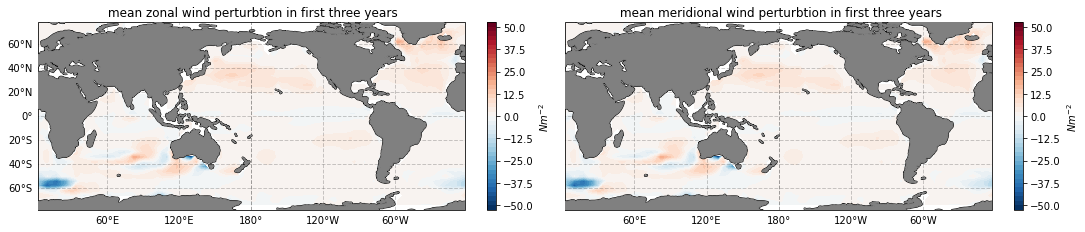

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3),constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 1})
for i, (img, ax) in enumerate(zip([taux_per,tauy_per], [ax1,ax2])):
    cs=img.mean(dim='time').where(ds.hFacC[0]).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(),
                                                             add_colorbar=True, add_labels=True,cmap=plt.cm.RdBu_r,
                extend='neither',robust=False,cbar_kwargs=dict(label=r'$N m^{-2}$'))
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if i == 0 :
        gl.left_labels = True

ax1.set_title(' mean zonal wind perturbtion in first three years')
ax2.set_title(' mean meridional wind perturbtion in first three years')
#plt.savefig('Results_snap/windper.png', bbox_inches='tight')

In [46]:
#file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp1_13yr/taux_per.bin'  
#raw = np.fromfile(file, dtype='>f')
#taux=np.reshape(raw, (156,40,90))

#file = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/trenberth_taux_10y.bin'  
#raw = np.fromfile(file, dtype='>f')
#taux_ref=np.reshape(raw, (120,40,90))

In [47]:
#time = pd.date_range("2000-01-15", periods=156, freq='M')
#taux = xr.DataArray(
#    data=taux,dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values, time=time))
#time = pd.date_range("2000-01-15", periods=120, freq='M')
#taux_ref = xr.DataArray(
#    data=taux_ref,dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values, time=time))

In [48]:
#taux_per.mean(dim='time')[10:,].plot()

In [49]:
#taux_per.sel(YC=slice(-60,-46),XG=slice(150,162))

In [79]:
# confine the purturbation within a region
#taux_per_mask=xr.zeros_like(taux_per)
#taux_per_mask[:,:10,:]=taux_per[:,:10,:]
#tauy_per_mask=xr.zeros_like(tauy_per)
#tauy_per_mask[:,:10,:]=tauy_per[:,:10,:]

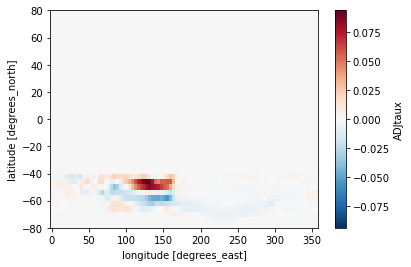

In [80]:
#taux_per_mask.mean(dim='time').plot()

In [14]:
# original wind + perturbation
taux_per=qnet[:36,:,:]+ taux_per.values
#tauy_per=tauy[-36:,:,:]+ tauy_per.values

# concatenate
taux_per=np.concatenate((taux_per,qnet[36:]), axis=0)
#tauy_per=np.concatenate((tauy[:-36],tauy_per, ), axis=0)

In [17]:
# concatenate
#exp_near_taux=np.concatenate((taux[:84], taux_per_near), axis=0)
#exp_mid_taux=np.concatenate((taux[:48], taux_per_mid, taux[84:]), axis=0)
#exp_long_taux=np.concatenate((taux[:12], taux_per_long, taux[48:]), axis=0)

#exp_near_tauy=np.concatenate((tauy[:84], tauy_per_near), axis=0)
#exp_mid_tauy=np.concatenate((tauy[:48], tauy_per_mid, tauy[84:]), axis=0)
#exp_long_tauy=np.concatenate((tauy[:12], tauy_per_long, tauy[48:]), axis=0)

In [22]:
# write to binary file
xmitgcm.utils.write_to_binary(taux_per.flatten(), '/work/uo0122/u301673/MITgcm_thesis/verification/g4/run_hfl_per/heat_per.bin')
#xmitgcm.utils.write_to_binary(tauy_per.flatten(), '/work/uo0122/u301673/MITgcm_thesis/verification/g4/wind_per/tauy_per3y_final_last3y.bin')


In [69]:
311040000/60/60/24/360

10.0

In [73]:
60*60*24*360*13/43200

9360.0

In [72]:
7200*43200

311040000

In [75]:
720*13

9360